1/1 [==============================] - 0s 272ms/step


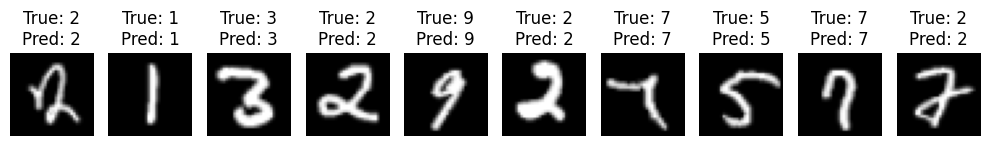

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the saved model
model = tf.keras.models.load_model('resnet_model.h5')

# Load the MNIST dataset
(_, _), (x_test, y_test) = mnist.load_data()

# Preprocess the test data
x_test = x_test.reshape((-1, 28, 28, 1))
x_test = tf.image.resize(x_test, (32, 32))
x_test = x_test / 255.0  # Normalize to [0, 1]

# Convert x_test to a NumPy array
x_test = x_test.numpy()

# Randomly select images from the test dataset
num_samples = 10
indices = np.random.choice(range(len(x_test)), size=num_samples, replace=False)
sample_images = x_test[indices]
sample_labels = y_test[indices]

# Make predictions using the model
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

# Plot the images with their predicted and actual labels
plt.figure(figsize=(10, 5))
for i, (image, true_label, pred_label) in enumerate(zip(sample_images, sample_labels, predicted_classes)):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
